In [110]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Load model

In [112]:
from models import loan_model

# load model
def model_prediction(x):
    return loan_model.predict(x)

def model_prediction_simple(x):
    return loan_model.simple_predict(x)

def model_classes():
    return loan_model.classes()

X = loan_model.get_data()

# Skater (analyze model)

## Feature importance

In [113]:
from src import feature_importance

features = feature_importance.get_features(model_prediction, X[1])
print("Feature Importance (predict_proba)")
print(features)

2019-04-14 23:51:20,203 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[12/12] features ████████████████████ Time elapsed: 0 secondsFeature Importance (predict_proba)
LoanAmount           0.181373
Credit_History       0.156863
CoapplicantIncome    0.134804
ApplicantIncome      0.125000
Married              0.090686
Rural                0.071078
Urban                0.058824
Dependents           0.056373
Loan_Amount_Term     0.044118
Gender               0.039216
Education            0.034314
Self_Employed        0.007353
dtype: float64


#### Using 'predict'

In [114]:
features_2 = feature_importance.get_features_2(model_prediction, X[0], model_classes)
print("Feature Importance (predict)")
features_2

2019-04-14 23:51:22,220 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[12/12] features ████████████████████ Time elapsed: 0 secondsFeature Importance (predict)


Credit_History       0.183029
LoanAmount           0.163394
ApplicantIncome      0.115708
CoapplicantIncome    0.113604
Married              0.094670
Dependents           0.069425
Rural                0.056101
Urban                0.054348
Education            0.041725
Loan_Amount_Term     0.039972
Gender               0.038219
Self_Employed        0.029804
dtype: float64

## partial dependence 


2019-04-14 23:51:26,281 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[29/29] grid cells ████████████████████ Time elapsed: 0 seconds

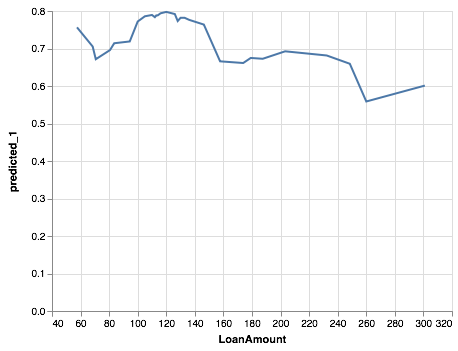

In [115]:
# partial_dependence = interpreter.partial_dependence.partial_dependence(['LoanAmount'], skater_model, grid_resolution=30)
from src import partial_dependence
dependency = partial_dependence.get_dependency(model_prediction, X[1], ['LoanAmount'])
alt.Chart(dependency).mark_line().encode(
    x='LoanAmount',
    y='predicted_1'
)

2019-04-14 23:51:27,756 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 0 seconds

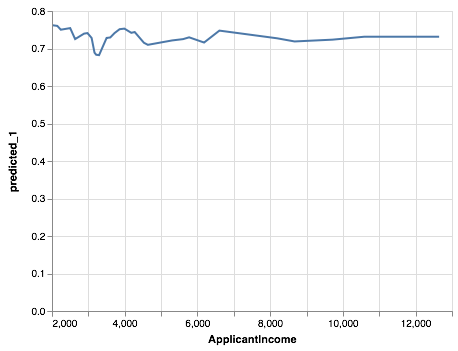

In [116]:
dependency = partial_dependence.get_dependency(model_prediction, X[1], ['ApplicantIncome'])
alt.Chart(dependency).mark_line().encode(
    x='ApplicantIncome',
    y='predicted_1'
)

2019-04-14 23:51:28,852 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 2 seconds

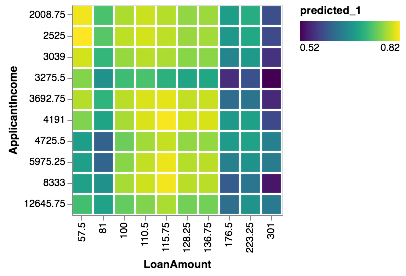

In [117]:
dependency = partial_dependence.get_dependency(model_prediction, 
                                               X[1], 
                                               ['LoanAmount', 'ApplicantIncome'],
                                               resolution=10)

alt.Chart(dependency).mark_rect().encode(
    x='LoanAmount:O',
    y='ApplicantIncome:O',
    color='predicted_1:Q'
)

### TreeSurrogates (Experimental)

In [118]:
help(interpreter.tree_surrogate)

Help on class TreeSurrogate in module skater.core.global_interpretation.tree_surrogate:

class TreeSurrogate(builtins.object)
 |  :: Experimental :: The implementation is currently experimental and might change in future.
 |  The idea of using TreeSurrogates as means for explaining a model's(Oracle or the base model)
 |  learned decision policies(for inductive learning tasks) is inspired by the work of Mark W. Craven
 |  described as the TREPAN algorithm. In this explanation learning hypothesis, the base estimator(Oracle)
 |  could be any form of supervised learning predictive models. The explanations are approximated using
 |  DecisionTrees(both for Classification/Regression) by learning decision boundaries similar to that learned by
 |  the Oracle(predictions from the base model are used for learning the DecisionTree representation).
 |  The implementation also generates a fidelity score to quantify tree based surrogate model's
 |  approximation to the Oracle. Ideally, the score shou